In [1]:
%pylab inline
%run ../utils.py

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = get_data()

In [5]:
from matplotlib.colors import LogNorm
import seaborn as s
s.set(rc={'image.cmap': "jet"})
config_plots(rcParams)

#1. Histofram of ECAL $\frac{dE}{dx}$

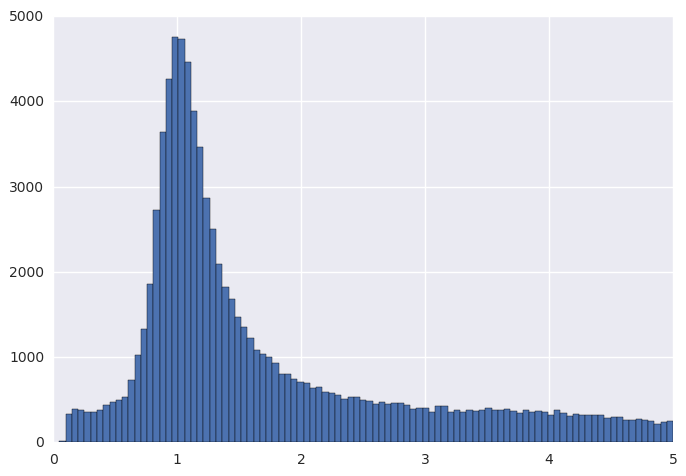

In [6]:
data['dedxECAL'][data['dedxECAL']>0].hist(bins=np.linspace(0,5,100))

#2 Number of MIP layer counts

(0, 100000)

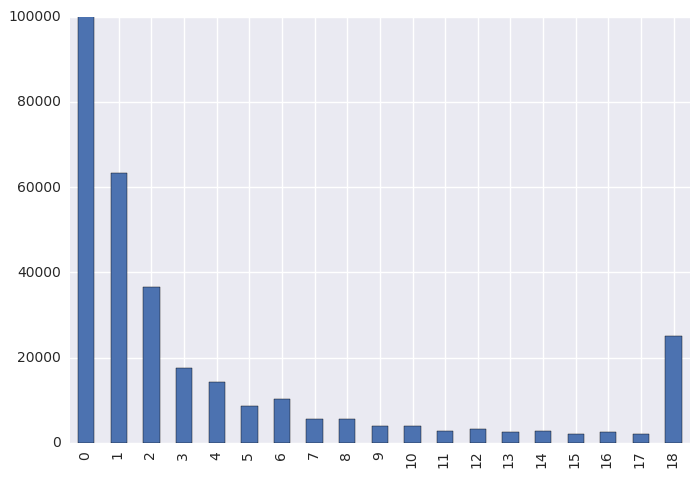

In [7]:
data['nlayMip'].value_counts().sort_index().plot(kind='bar')
ylim(0,100000)

#3. $\frac{dE}{dx}$ by the MIP layer

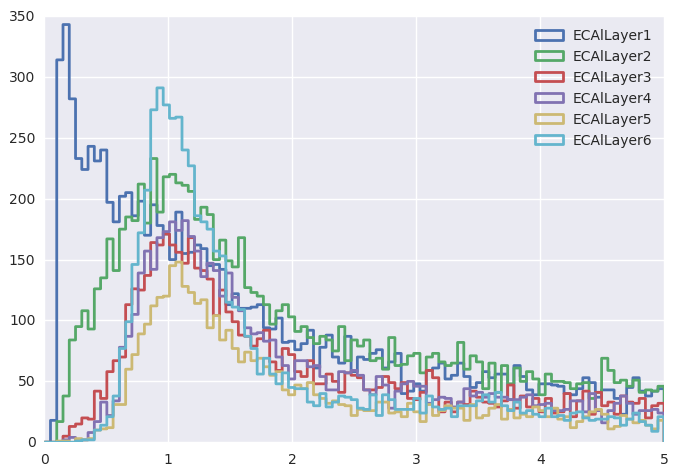

In [8]:
idx = (data['dedxECAL']>0)
def getdedx(nlayer):
    return data['dedxECAL'][idx & (data['nlayMip'] == layer)]
for layer in range(1,7):
    getdedx(layer).hist(bins=np.linspace(0,5,100), histtype='step', lw=2, label='ECAlLayer'+str(layer))
legend()